# The Lattice Boltzmann model 
A short report by: Tom de Krom (4281594) and Vincent Heusinkveld (4390725)

---
## Introduction 
In this project, the Lattice Boltzmann model is considered. It is a so-called 'toy model', solely based on the laws of energy, mass and momentum conservation. And it uses the isotropic relaxation of stress.  

---
## The Lattice Boltzmann model 
In the model, only densities of particles, $n_i$, and velocity, $v_i$, with a certain direction are taken into account. These directions correspond to the vectors labeled I making up the lattice. In this case, a 9 vector lattice is used called the d2q9 lattice as shown in the figure below (Thijssen 2007): 

![d2q9_lattice](./images/d2q9.png)

It seems that the weights in Thijssen 2007 for the vectors of length sqrt(2) are mixed up with those of length 1. This can be seen in, for example, Bao and Meskas 2011, and other sources. Hence we reversed them in our code.

### The algorithm

The algorithm works as follows (Thijssen 2007):

- The densities $n_i$ are moved to the appropriate neighbour according to the direction of the lattice vectors.
- If the velocities pass over the boundaries they should be reversed.
- The velocities are calulated at each point and are weighted according to their respective density.
- A small velocity is added in the flow direction to simulate a pressure gradient. 
- The equilibrium distribution is calulated according to formula 14.34 of Thijssen 2007.
- The densites are relaxed at each point according to: $n_i^{new} = (1-1/\tau)n_i^{old} + n^{eq}_i/\tau$. In which $\tau$ is the relaxation time.

### Usefull relations 

The relation between the viscocity and the relaxation time is given by: $\nu = \frac{2\tau - 1}{6}\frac{\Delta x^2}{\Delta t}$. (Thijssen 2007)

The curvature of the velocity of the flow should be $\nabla P/\rho v$. In which $\nabla P$ can be related to the velocity addition in the flow direction via: $ \nabla P = c\rho\Delta v $. (Thijssen 2007)



---
## The simulation 
### The setup
For the geometry a 2D 'torus-pipe' is defined, to which a square or circular obstruction can be added, which will be centered at $\left( 0.5W, 0.25L \right)$ in the pipe. (It is called a 'torus-pipe' as the outflow is given as inflow to the 2D pipe.) Then the lattice vectors are defined, including a relationship between the lattice vector and its inverse (version in opposite direction). This is later needed to incorporate the boundary conditions. 

As for the parameters, $\Delta x$ and $\Delta t$ are set to 1 to simplify the relations. The maximum number of simulation iterations and the viscosity can be set to the desired value. The viscosity should be defined such that the relaxation time, $\tau$, is bigger than 1. This is to ensure that the system does not relax faster than the minimal time step, $\Delta t$. 

### Application of the algorithm
The simulation is initialized such that the density everywhere equals 1 except for the boundaries and in the obstruction, at which it is set to 0. Then a velocity forcing in applied (due to the pressure gradient), after which the equilibrium distribution, $n_{eq}$, is determined for every lattice point.

After this, the algorithm described above is implemented. For the translation of the densities, `numpy.roll()` is used in combination with the lattice vectors. 

The boundary condition has the following working principle:
If the density corresponding to vector `[1,0]` crosses the right boundary, the density gets transferred to the `[-1,0]` vector, such that the next time step the density returns to the pipe domain. 

The rest of the code is implemented straightforwardly. Due to how our functions are defined the order is a little different than used by Thijssen. 

### The equilibrium stage
The simulation for the 2D 'torus-pipe' is stopped by the simulation once a global equilibrium has been reached. This equilibrium is based on the velocity in both x and y-direction in the geometry. Once the velocity in every grid point of the geometry does not change much with respect to the previous iteration $(v_i - v_{i-1} < \epsilon)$, the simulation is regarded to be in equilibrium and is therefore ended. $\epsilon$ is set to 0.001 which is about 2 orders of magnitude smaller than the flow velocity through the pipe (in the y-direction). This procedure is only used for the geometry without any obstructions. For the cases with obstructions, the maximum amount of iterations is done, which is 1000.

---
## Results and Discussion 

The results are shown for a 500 by 100 torus-pipe unless stated otherwise.


### Flow without obstruction
The flow in the 2D 'torus-pipe' up to equilibrium (for $\epsilon$ < 0.001) is shown in figure .... The equilibrium stage is reached after 344 iterations. Re = xxx hence we expect laminar flow ... (maybe don't include this)

ADD theoretical velocity profile for 500 by 100, or keep it 60 bij 20 to be consisten with simulatino check latee.

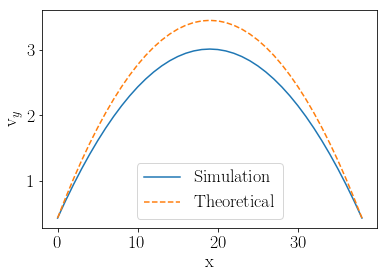

### Flow around a square obstacle


### Flow around a cilinder

---
## Conclusion 

---
## Code checks

### Parabolic flow profile

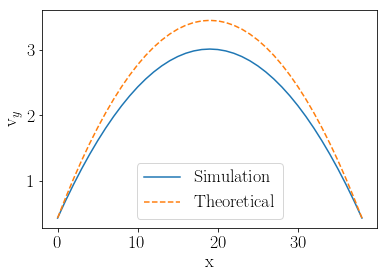

### Conservation
**Equilibrium**
The velocity is initialized at zero, at every time step a small velocity is added which simulates a $\Delta P$. At some point, the velocity should equilibrate. This behavior is indeed observed as can be seen in the figure below where the average velocity per particle is plotted vs the simulation iterations.

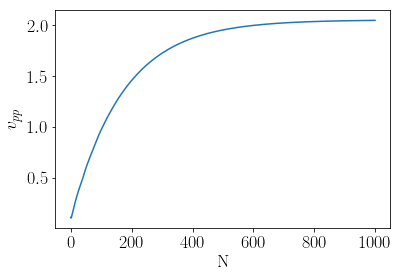

**Energy:** The kinetic energy in the system is shown in the plot below. It can be seen that after an initial period of added velocities in the flow direction, equilibrium is reached and kinetic energy is conserved. This equilibrium seems to be earlier reached than for the plot above due to the quadratic scaling of kinetic energy with velocity. The start of the plot is due to the initial conditions.

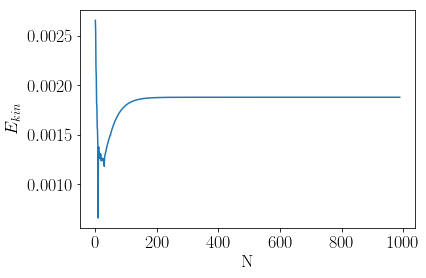

**Density:**
In the following graph, it can be seen that the density averaged per particle is conserved during the simulation. Notice the scientific notation on the top. The average density is slightly lower than 1 since the borders are initialized on 0 density while the rest of the pipe is initialized at 1.

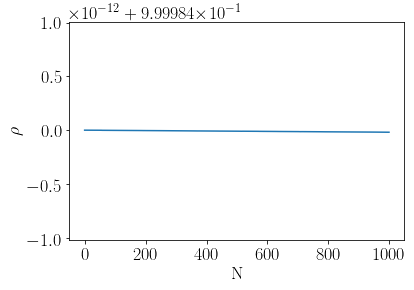

---
## Simulation performance
As can be seen in the plot below, the simulation scaling is linear with the number of grid points (in the limit), hence quadratic with sytem size. Overal for 1000 iterations and 100,000 grid points one should expect a simulation time of around 1.5 minutes.

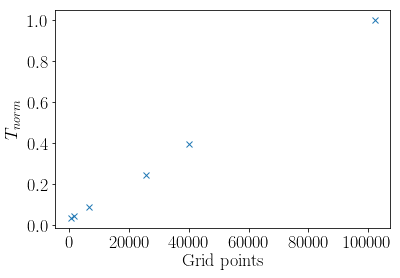

---
## Collaboration 
This time collaboration proved to be a bit harder due to increased load from other courses. This meant that Vincent had a bit more time at the start, while Tom in the later parts of the project. We solved this by letting one be more concerned with the setup of the code and the other by checking and optimizing the code. The project itself was, compared to the others, more difficult for us, due to several bugs we encountered (for example the weights in the equilibrium distribution formula as discussed in the text). In the end, we managed to solve most of them although some behavior stays unexplained. For the next project, a takeaway is to be both at the start more involved. Such to set out the code structure together since this makes errors less likely to happen and leads to more logical code.    

**Both:** Boltzmann Lattice algorithm, data-processing, report, overal small tweaks

**Tom:** Animation, alogrithm optimisation

**Vincent:** Initial algorithm implementation


---
## Sources
- Thijssen, J. (2007). Computational physics, 2nd edition. Camebridge University Press
-  Bao and Meskas (2011). Lattice Boltzmann Method for Fluid Simulations. url: https://cims.nyu.edu/~billbao/report930.pdf Retrieved on 31-05-2018